In [1]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn import svm

In [2]:
# read data from csv file
data = pd.read_csv('Datasets/diabetes.csv')

# data.shape
print(data)
data.head()

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Start preprocessing phase
# check missing values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
# put sum null values 
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.NaN) # replace every 0 with null
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [5]:
# Replacing NaN with mean values

data["Glucose"].fillna(data["Glucose"].mean(), inplace = True) 
data["BloodPressure"].fillna(data["BloodPressure"].mean(), inplace = True)
data["SkinThickness"].fillna(data["SkinThickness"].mean(), inplace = True)
data["Insulin"].fillna(data["Insulin"].mean(), inplace = True)
data["BMI"].fillna(data["BMI"].mean(), inplace = True)

# fillna used to replace null values with mean values

data.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

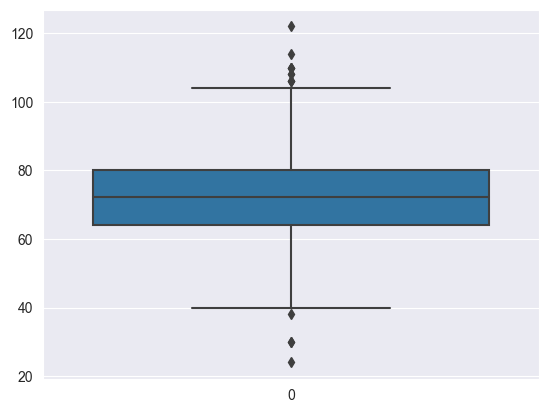

In [6]:
# visualization phase
import matplotlib.pyplot as plt
from seaborn import lineplot, distplot, scatterplot, boxplot

boxplot(data = data["BloodPressure"])
plt.show()



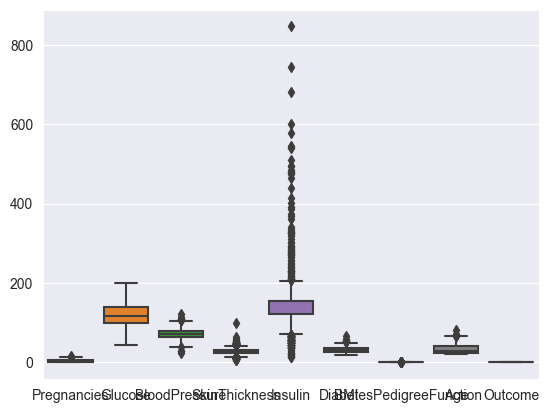

In [7]:
boxplot(data = data)
plt.show()

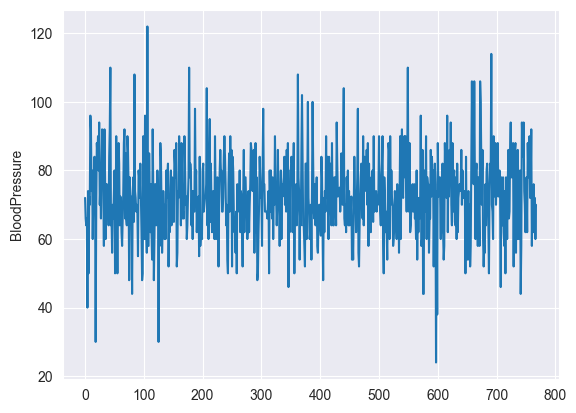

In [8]:
lineplot(data = 
         data["BloodPressure"])
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_14728\2352183314.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  distplot(a = data["Insulin"])


<function matplotlib.pyplot.show(close=None, block=None)>

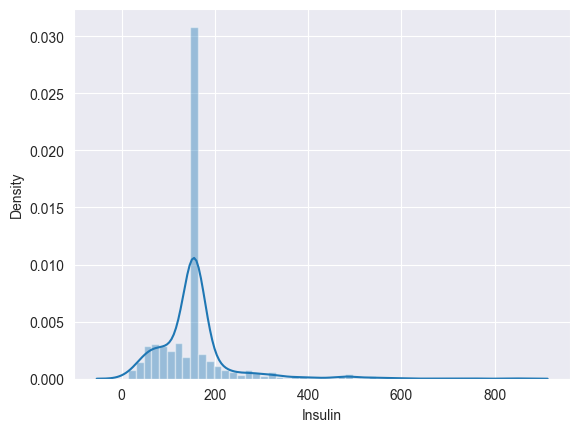

In [9]:
distplot(a = data["Insulin"])
plt.show

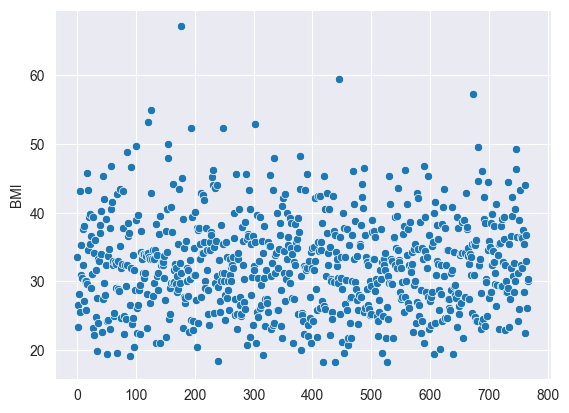

In [10]:
scatterplot(data = data["BMI"])
plt.show()

In [11]:
# KNN algorithm

x = data.drop(['Outcome'], axis=1)
# print(x.head())
y = data['Outcome']
print(y.head())

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)


knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(x_train, y_train)

y_knnprediction = knn.predict(x_test)
print(y_knnprediction)


print("Confusion Matrix: ",confusion_matrix(y_test, y_knnprediction))

print("Classification Report:",classification_report(y_test, y_knnprediction))

print("Accuracy:",accuracy_score(y_test,y_knnprediction)*100)


[0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0
 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1
 0 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0]
Confusion Matrix:  [[125  21]
 [ 35  50]]
Classification Report:               precision    recall  f1-score   support

           0       0.78      0.86      0.82       146
           1       0.70      0.59      0.64        85

    accuracy                           0.76       231
   macro avg       0.74      0.72      0.73       231
weighted avg       0.75      0.76      0.75       231

Accuracy: 75.75757575757575


In [13]:
# applying SVM code

classifier = svm.SVC(kernel="rbf")
classifier.fit(x_train, y_train)
y_svmprediction = classifier.predict(x_test)
print(y_svmprediction)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0
 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0]


In [14]:
print("Confusion Matrix: ",confusion_matrix(y_test, y_svmprediction))

print("Classification Report:",classification_report(y_test, y_svmprediction))

print("Accuracy:",accuracy_score(y_test,y_svmprediction)*100)

Confusion Matrix:  [[137   9]
 [ 46  39]]
Classification Report:               precision    recall  f1-score   support

           0       0.75      0.94      0.83       146
           1       0.81      0.46      0.59        85

    accuracy                           0.76       231
   macro avg       0.78      0.70      0.71       231
weighted avg       0.77      0.76      0.74       231

Accuracy: 76.19047619047619
